## EDA on States

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from itertools import combinations

In [36]:
data = pd.read_csv("extracted_ipeds_cs_shef_socioeconomic_features 2.csv")

In [37]:
data.columns

Index(['UNITID', 'STABBR', 'CINSFAM', 'CINSOFF', 'COTSFAM', 'COTSOFF', 'FEE2',
       'FEE3', 'TUITION2', 'TUITION3', 'ANYAIDN', 'ANYAIDP', 'FGRNT_N',
       'FGRNT_P', 'PGRNT_N', 'SCUGFFN', 'SCUGFFP', 'UPGRNTN', 'PGREVCT',
       'SSREVCT', 'year', 'BOOKSUPPLY', 'GRAD_DEBT_MDN', 'OPEFLAG',
       'OTHEREXPENSE_FAM', 'OTHEREXPENSE_OFF', 'ROOMBOARD_OFF',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'UGDS_MEN', 'UGDS_NRA', 'UGDS_WOMEN',
       'PCTPELL', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_NHPI', 'UGDS_WHITE', 'NPT41_PRIV', 'NPT4_048_PRIV',
       'NPT4_PRIV', 'NUM41_PRIV', 'NUM42_PRIV', 'NUM43_PRIV', 'NUM44_PRIV',
       'NUM45_PRIV', 'OMAWDP8_NOPELL_ALL', 'OMENRAP_NOPELL_ALL',
       'OMENRAP_PELL_ALL', 'OMENRYP_NOPELL_ALL', 'OMENRYP_PELL_ALL',
       'HECA_Inflation_Adjustment', 'CPI_Inflation_Adjustment',
       'Total_State_Support', 'Total_Financial_Aid',
       'Education_Appropriations',
       'State_Public_Financial_Aid_as_a_Percent_of_E

In [38]:
data.head()

UNITID STABBR  CINSFAM  CINSOFF  COTSFAM  COTSOFF   FEE2    FEE3  TUITION2  \
0  100654     AL   7520.0  13590.0  11420.0  17490.0  520.0   520.0    3120.0   
1  100663     AL   8937.0  17760.0  14697.0  23520.0  822.0   822.0    3840.0   
2  100690     AL  12114.0  19896.0  12114.0  19896.0    0.0     0.0   10040.0   
3  100706     AL   7516.0  13996.0  12518.0  18998.0  870.0  1740.0    3646.0   
4  100724     AL   7628.0  13253.0  11636.0  17261.0    0.0     0.0    4008.0   

   TUITION3  ...  HECA_Inflation_Adjustment  CPI_Inflation_Adjustment  \
0    6240.0  ...                   0.600923                  0.601003   
1    9600.0  ...                   0.600923                  0.601003   
2   10040.0  ...                   0.600923                  0.601003   
3    7778.0  ...                   0.600923                  0.601003   
4    8016.0  ...                   0.600923                  0.601003   

   Total_State_Support  Total_Financial_Aid  Education_Appropriations  \
0           1167536776           19460984.0                 858965823   
1           1167536776           19460984.0                 858965823   
2           1167536776           19460984.0                 858965823   
3           1167536776           19460984.0                 858965823   
4           1167536776           19460984.0                 858965823   

   State_Public_Financial_Aid_as_a_Percent_of_Education_Appropriations  \
0                                           0.020129                     
1                                           0.020129                     
2                                           0.020129                     
3                                           0.020129                     
4                                           0.020129                     

   Net_Tuition_and_Fee_Revenue  Student_Share  Net_FTE_Enrollment  \
0                    805323633       0.483884              183167   
1                    805323633       0.483884              183167   
2                    805323633       0.483884              183167   
3                    805323633       0.483884              183167   
4                    805323633       0.483884              183167   

   State_Public_Financial_Aid  
0                  17290430.0  
1                  17290430.0  
2                  17290430.0  
3                  17290430.0  
4                  17290430.0  

[5 rows x 63 columns]

## Plot each independent variable against dependent

In [57]:
independent_variables = sorted(data.drop('GRAD_DEBT_MDN', axis=1).columns)
dependent_variable = 'GRAD_DEBT_MDN'

62it [00:00, 212.34it/s]


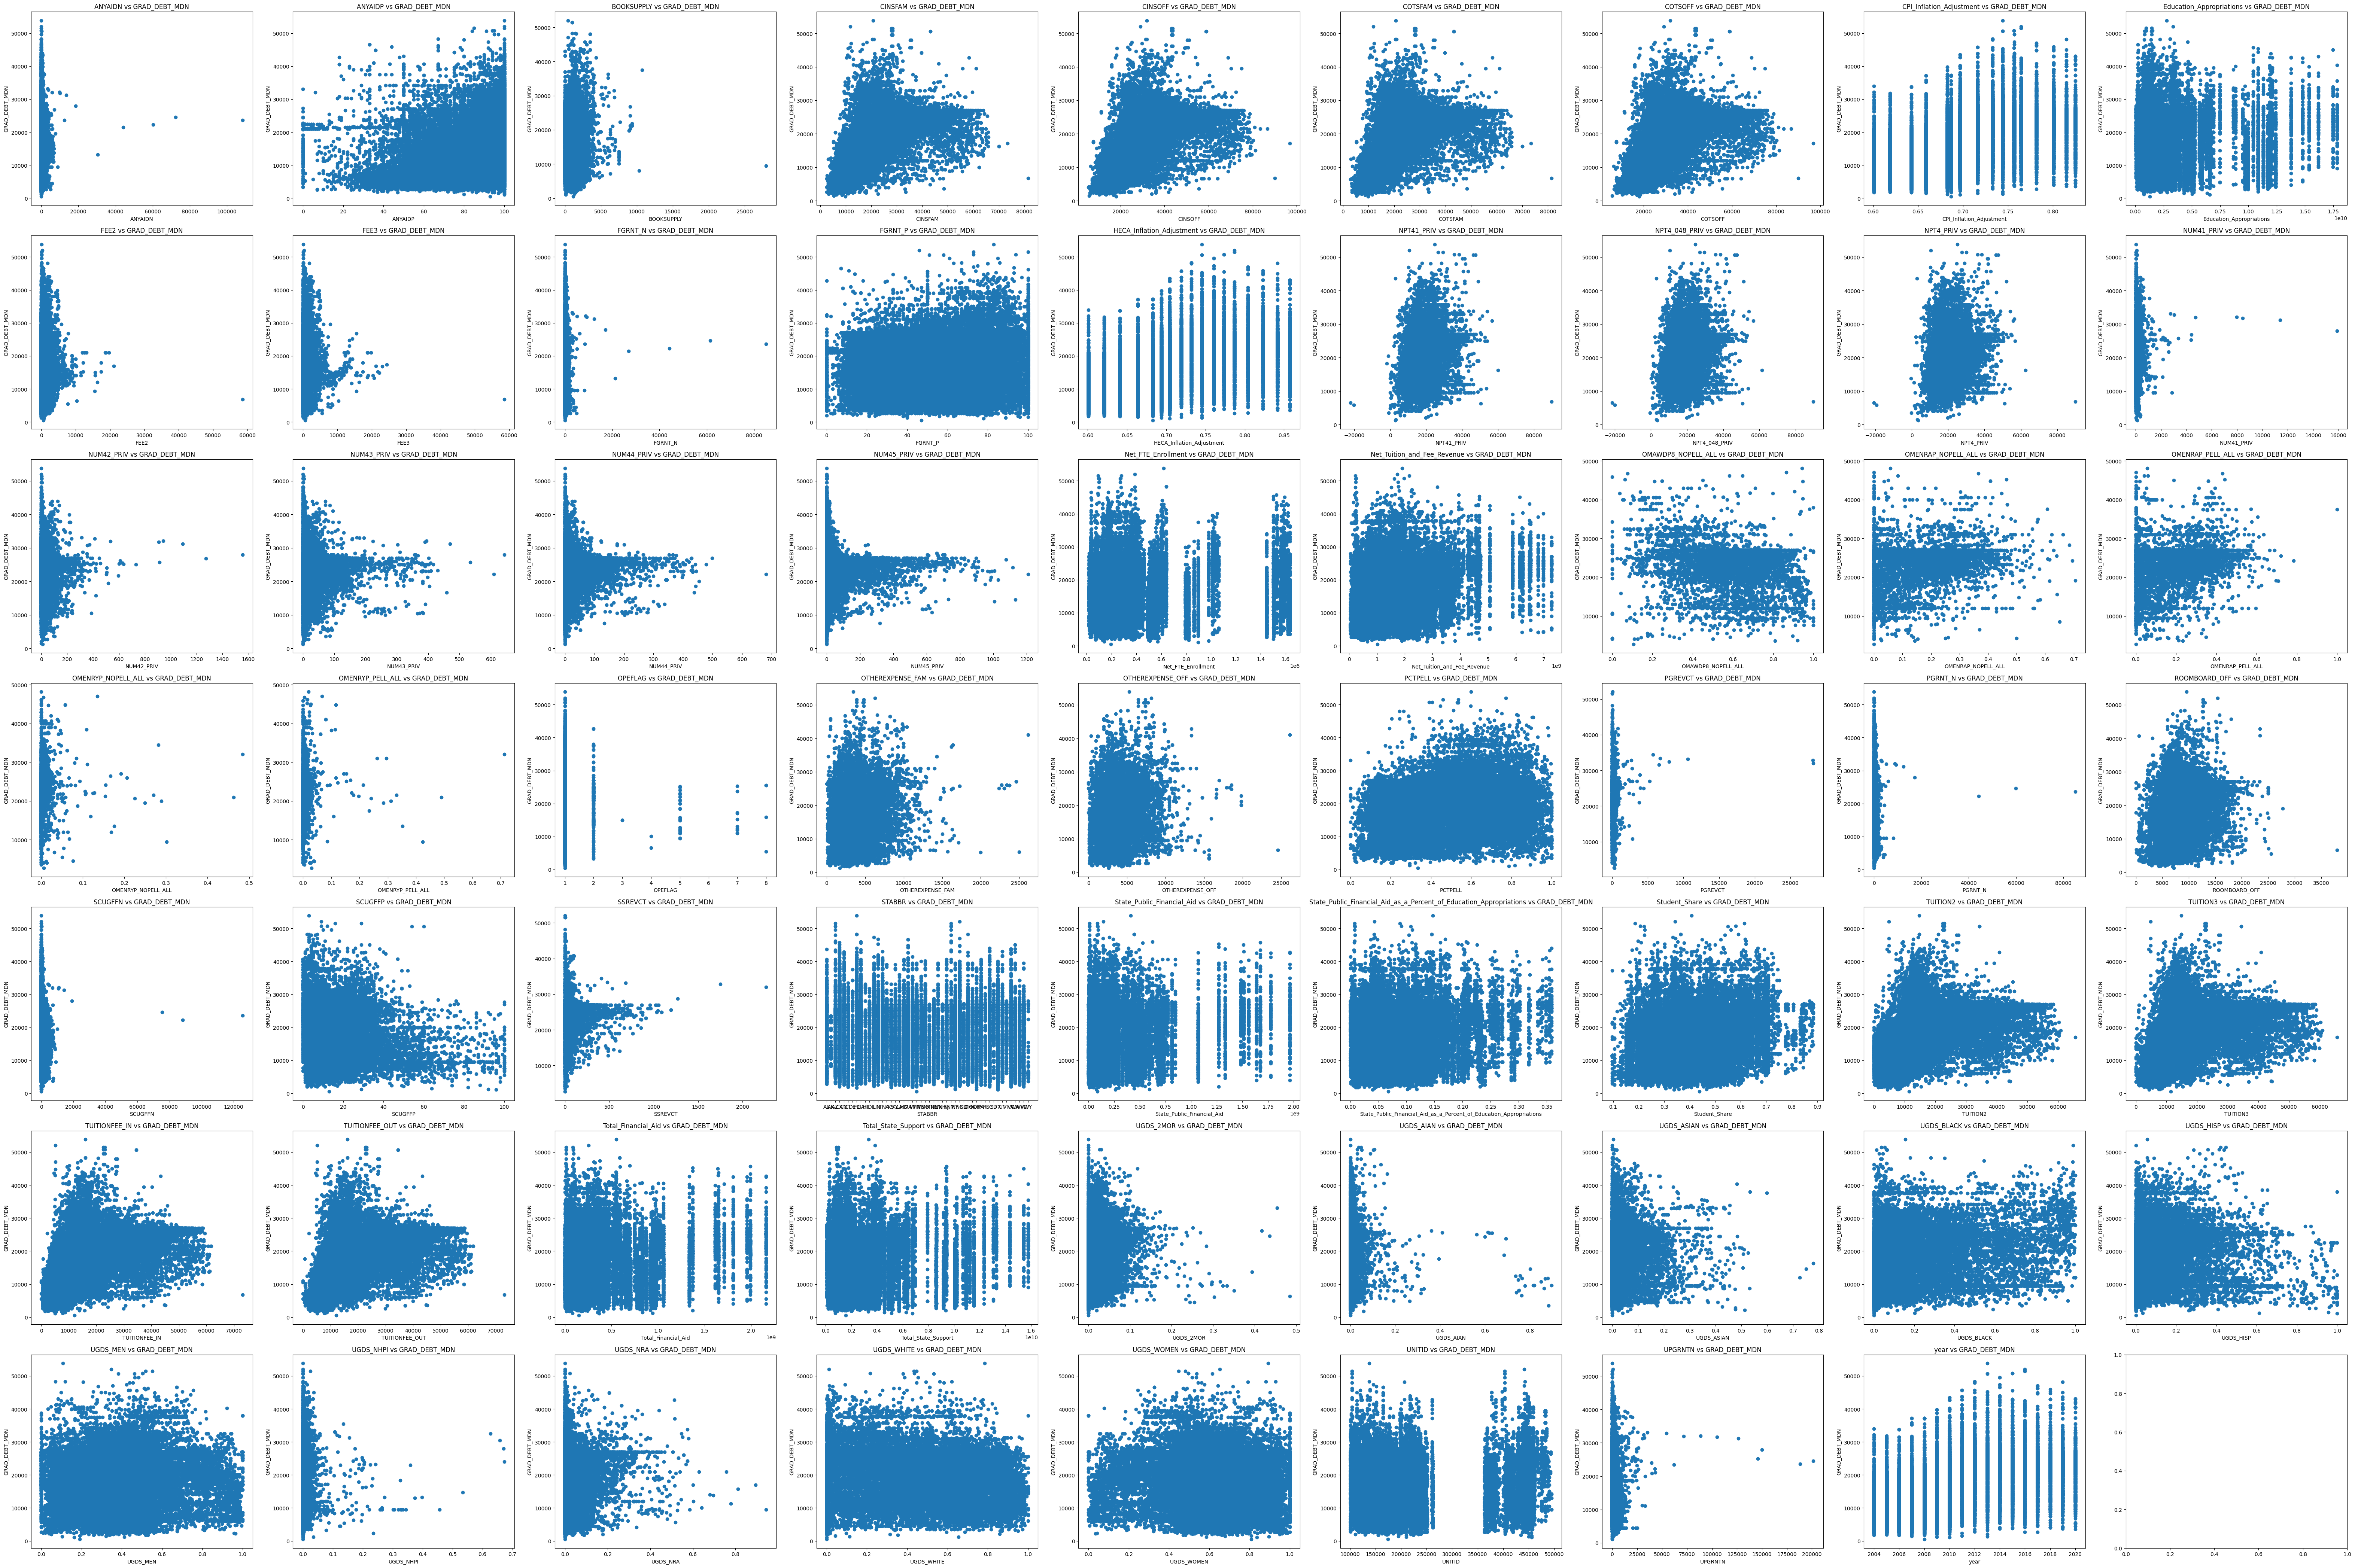

In [58]:
# Determine grid size for subplots
num_independent_vars = len(independent_variables)
rows = int(num_independent_vars**0.5)
cols = (num_independent_vars + rows - 1) // rows # Calculate columns to ensure all plots fit

fig, axs = plt.subplots(rows, cols, figsize=(7 * cols, 6 * rows)) # Adjust figsize as needed
axs = axs.flatten() # Flatten the array of axes for easy iteration

for i, ind_var in tqdm(enumerate(independent_variables)):
    axs[i].scatter(data[ind_var], data[dependent_variable])
    axs[i].set_xlabel(ind_var)
    axs[i].set_ylabel(dependent_variable)
    axs[i].set_title(f'{ind_var} vs {dependent_variable}')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Boxplot of each independent variable

In [63]:
len(numerical_cols)

62

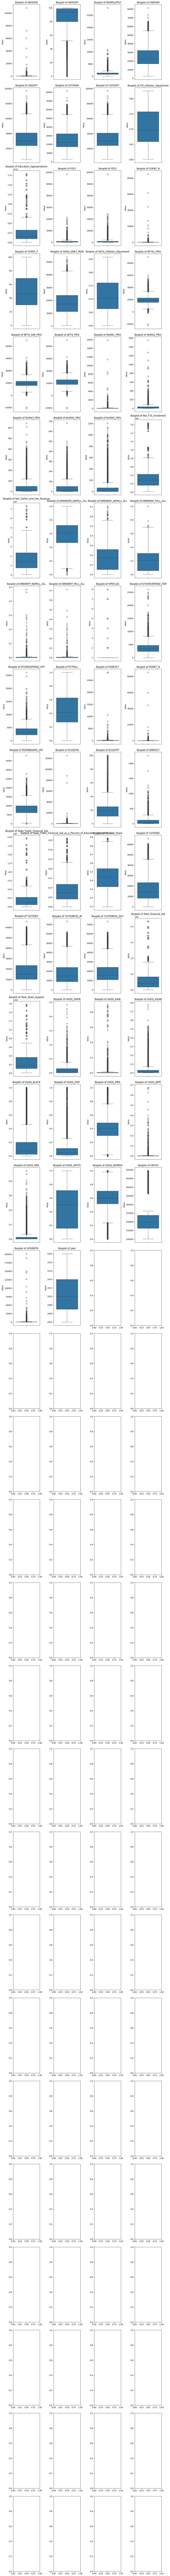

In [67]:
df = pd.DataFrame(data)

# Get numerical columns
numerical_cols = sorted(df.select_dtypes(include=['number']).columns)


# Determine subplot layout
num_cols = len(numerical_cols)
n_rows = (num_cols + 1) // 2  # Adjust as needed for desired layout
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3 , n_rows * 6))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [5]:
y = trainData['GRAD_DEBT_MDN']


(4416, 86)

In [15]:
## removing the categorical state variables
trainData = trainData.filter(regex='^(?!cat).*$', axis=1)
# testData = testData.filter(regex='^(?!cat).*$', axis=1)

In [16]:
correlation_matrix = trainData.corr()

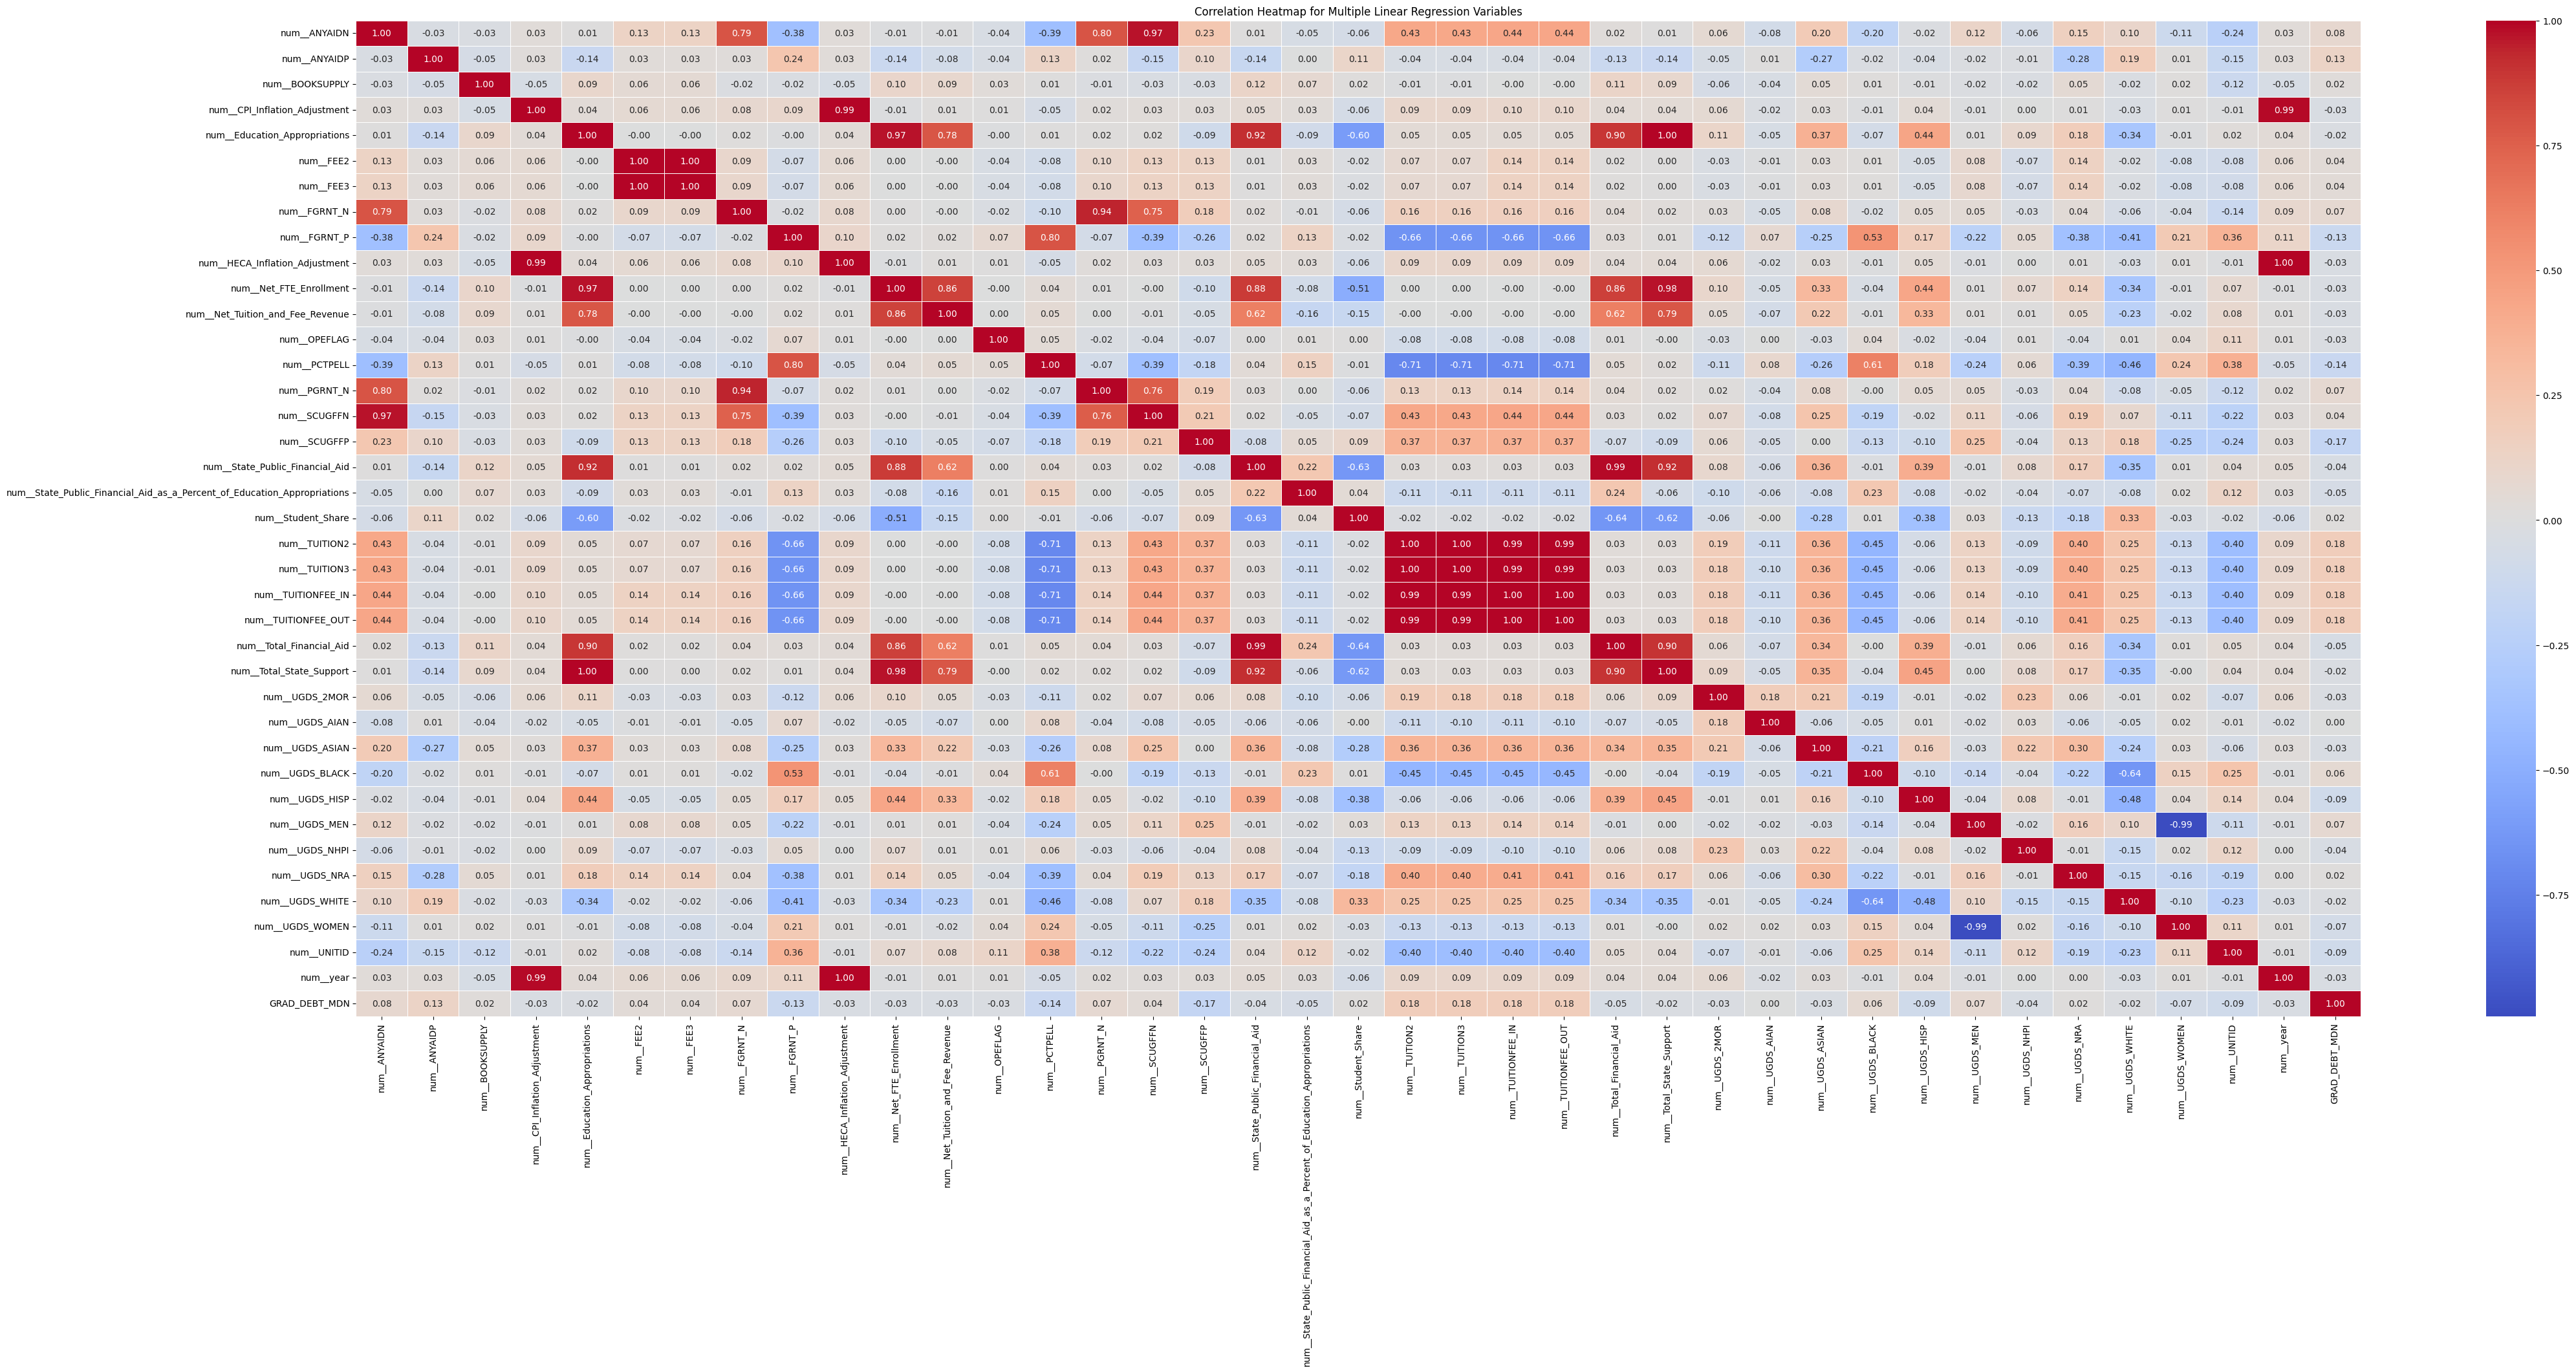

In [17]:
plt.figure(figsize=(50, 20)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Multiple Linear Regression Variables')
plt.show()